In [1]:
#importing dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#imporing data
film_df=pd.read_csv('film_data.csv')
actor_df=pd.read_csv('actor_data.csv')
film_actor_df=pd.read_csv('film_actor_data.csv')

### 1. Basic Analysis of Data

In [3]:
film_df.head(2)

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,last_update,special_features,fulltext
0,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,NC-17,2013-05-26 14:50:58.951,{Trailers},'chamber':1 'fate':4 'husband':11 'italian':2 ...
1,384,Grosse Wonderful,A Epic Drama of a Cat And a Explorer who must ...,2006,1,5,4.99,49,19.99,R,2013-05-26 14:50:58.951,"{""Behind the Scenes""}",'australia':18 'cat':8 'drama':5 'epic':4 'exp...


In [7]:
film_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   film_id           1000 non-null   int64  
 1   title             1000 non-null   object 
 2   description       1000 non-null   object 
 3   release_year      1000 non-null   int64  
 4   language_id       1000 non-null   int64  
 5   rental_duration   1000 non-null   int64  
 6   rental_rate       1000 non-null   float64
 7   length            1000 non-null   int64  
 8   replacement_cost  1000 non-null   float64
 9   rating            1000 non-null   object 
 10  last_update       1000 non-null   object 
 11  special_features  1000 non-null   object 
 12  fulltext          1000 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 101.7+ KB


> ***Checking for duplicate values...***

In [11]:
film_df[film_df.duplicated()]
# There is no duplicate value in film_df table.

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,last_update,special_features,fulltext


In [10]:
film_actor_df[film_actor_df.duplicated()]
# There is no duplicate value in film_actor_df table.

,actor_id,film_id,last_update


In [12]:
actor_df[actor_df.duplicated()]
# There is no duplicate value in actor_df table.

,actor_id,first_name,last_name,last_update


>***Checking for missing values..***

In [13]:
film_df.isnull().sum()

film_id             0
title               0
description         0
release_year        0
language_id         0
rental_duration     0
rental_rate         0
length              0
replacement_cost    0
rating              0
last_update         0
special_features    0
fulltext            0
dtype: int64

In [15]:
film_actor_df.isnull().sum()

actor_id       0
film_id        0
last_update    0
dtype: int64

In [16]:
actor_df.isnull().sum()

actor_id       0
first_name     0
last_name      0
last_update    0
dtype: int64

In [ ]:
#There is no missing values in any of the tables.

### A. Analyzing film_df table..

In [18]:
film_df.head(2)

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,last_update,special_features,fulltext
0,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,NC-17,2013-05-26 14:50:58.951,{Trailers},'chamber':1 'fate':4 'husband':11 'italian':2 ...
1,384,Grosse Wonderful,A Epic Drama of a Cat And a Explorer who must ...,2006,1,5,4.99,49,19.99,R,2013-05-26 14:50:58.951,"{""Behind the Scenes""}",'australia':18 'cat':8 'drama':5 'epic':4 'exp...


In [160]:
film_df.shape

(1000, 13)

In [19]:
film_df['film_id'].nunique()

1000

In [20]:
film_df['title'].nunique()

1000

In [21]:
film_df['description'].nunique()

1000

In [22]:
film_df['release_year'].nunique()

1

In [23]:
film_df['language_id'].nunique()

1

In [24]:
film_df['rental_duration'].nunique()

5

In [26]:
film_df['rental_duration'].value_counts().sort_values(ascending=False)

6    212
4    203
3    203
7    191
5    191
Name: rental_duration, dtype: int64

In [27]:
film_df['rental_rate'].nunique()

3

In [32]:
film_df['rental_rate'].value_counts().sort_index(ascending=False)

4.99    336
2.99    323
0.99    341
Name: rental_rate, dtype: int64

In [29]:
film_df['length'].nunique()

140

In [30]:
film_df['replacement_cost'].nunique()

21

In [33]:
film_df['replacement_cost'].value_counts().sort_index(ascending=False)

29.99    53
28.99    41
27.99    53
26.99    46
25.99    43
24.99    38
23.99    45
22.99    55
21.99    55
20.99    57
19.99    50
18.99    42
17.99    47
16.99    38
15.99    37
14.99    51
13.99    55
12.99    55
11.99    49
10.99    49
9.99     41
Name: replacement_cost, dtype: int64

In [34]:
film_df['rating'].nunique()

5

In [35]:
film_df['rating'].value_counts().sort_values(ascending=False)

PG-13    223
NC-17    210
R        195
PG       194
G        178
Name: rating, dtype: int64

In [36]:
film_df['special_features'].nunique()

15

In [37]:
film_df['special_features'].value_counts().sort_values(ascending=False)

{Trailers,Commentaries,"Behind the Scenes"}                     79
{Trailers}                                                      72
{Trailers,Commentaries}                                         72
{Trailers,"Behind the Scenes"}                                  72
{"Deleted Scenes","Behind the Scenes"}                          71
{"Behind the Scenes"}                                           70
{Commentaries,"Behind the Scenes"}                              70
{Trailers,"Deleted Scenes"}                                     66
{Commentaries,"Deleted Scenes","Behind the Scenes"}             66
{Commentaries,"Deleted Scenes"}                                 65
{Trailers,Commentaries,"Deleted Scenes"}                        64
{Commentaries}                                                  62
{"Deleted Scenes"}                                              61
{Trailers,Commentaries,"Deleted Scenes","Behind the Scenes"}    61
{Trailers,"Deleted Scenes","Behind the Scenes"}               

In [38]:
film_df['fulltext'].nunique()

1000

### Feature Engineering..

In [39]:
film_df['last_update']

0      2013-05-26 14:50:58.951
1      2013-05-26 14:50:58.951
2      2013-05-26 14:50:58.951
3      2013-05-26 14:50:58.951
4      2013-05-26 14:50:58.951
                ...           
995    2013-05-26 14:50:58.951
996    2013-05-26 14:50:58.951
997    2013-05-26 14:50:58.951
998    2013-05-26 14:50:58.951
999    2013-05-26 14:50:58.951
Name: last_update, Length: 1000, dtype: object

In [41]:
### Let's change datatype of this column to datetime datatype..
film_df['last_update']=pd.to_datetime(film_df['last_update'])

### EDA

In [42]:
film_df.columns

Index(['film_id', 'title', 'description', 'release_year', 'language_id',
       'rental_duration', 'rental_rate', 'length', 'replacement_cost',
       'rating', 'last_update', 'special_features', 'fulltext'],
      dtype='object')

In [45]:
sns.set_style('darkgrid')

<AxesSubplot:xlabel='rental_duration', ylabel='rental_rate'>

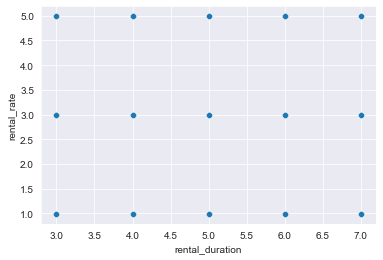

In [46]:
sns.scatterplot(x='rental_duration',y='rental_rate',data=film_df)

<AxesSubplot:xlabel='rental_duration', ylabel='Count'>

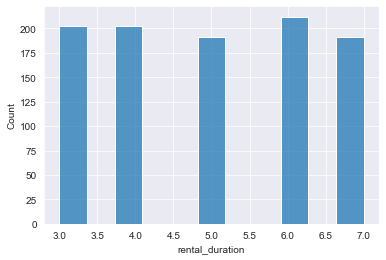

In [49]:
sns.histplot(x='rental_duration',data=film_df)

<AxesSubplot:xlabel='rental_rate', ylabel='Count'>

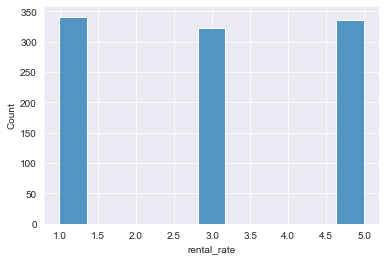

In [50]:
sns.histplot(x='rental_rate',data=film_df)

<AxesSubplot:xlabel='rental_duration', ylabel='Count'>

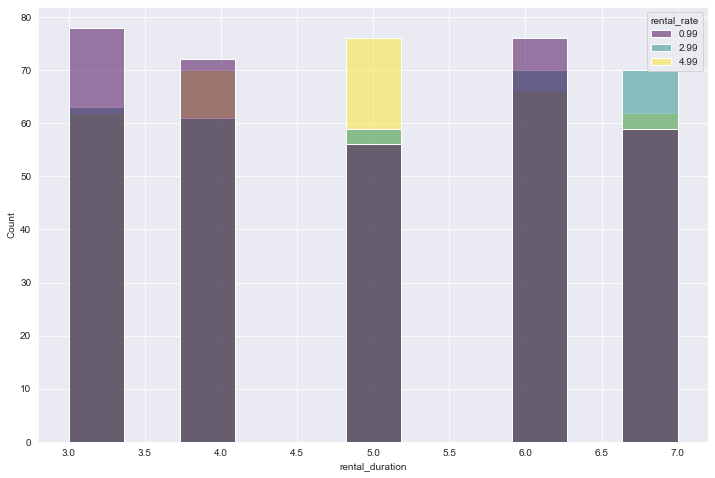

In [74]:
plt.figure(figsize=(12,8))
sns.histplot(x='rental_duration',data=film_df,hue='rental_rate',palette='viridis')

<AxesSubplot:xlabel='length', ylabel='Count'>

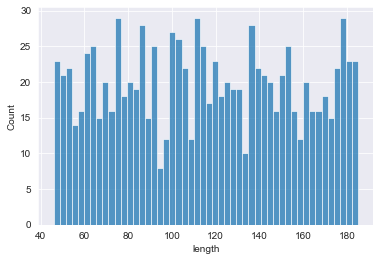

In [70]:
sns.histplot(film_df['length'],bins=50)

<AxesSubplot:xlabel='replacement_cost', ylabel='Count'>

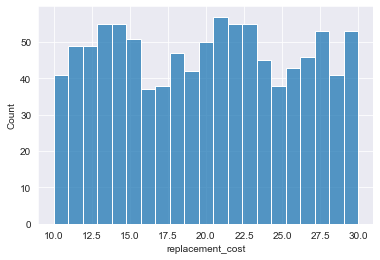

In [77]:
sns.histplot(film_df['replacement_cost'],bins=21)

<AxesSubplot:>

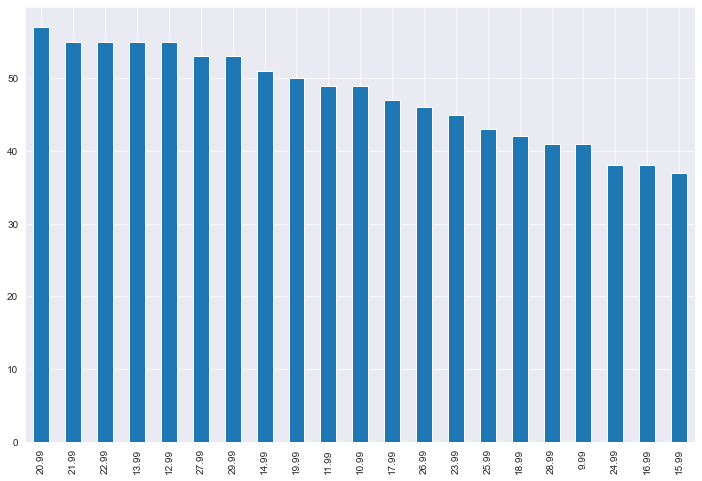

In [84]:
film_df['replacement_cost'].value_counts().sort_values(ascending=False).plot(kind='bar',figsize=(12,8))

<AxesSubplot:>

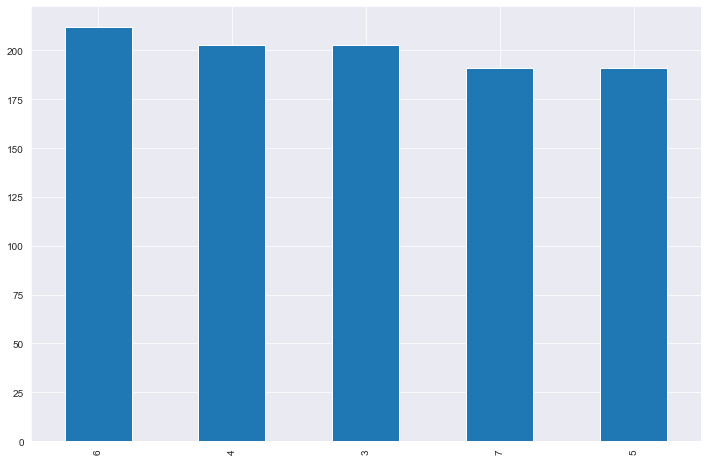

In [85]:
film_df['rental_duration'].value_counts().sort_values(ascending=False).plot(kind='bar',figsize=(12,8))

<AxesSubplot:>

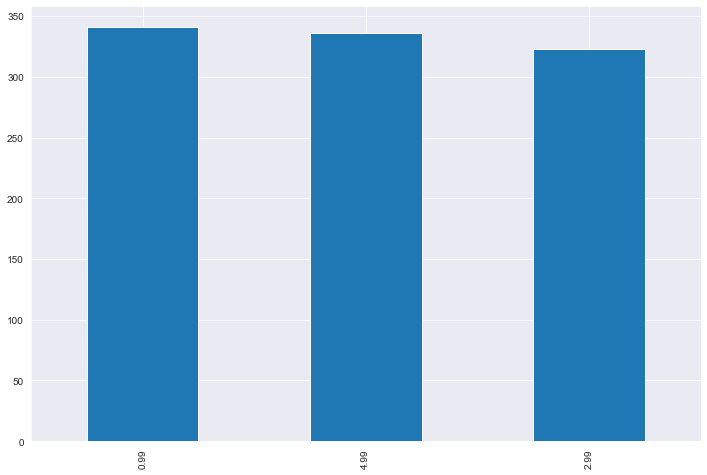

In [86]:
film_df['rental_rate'].value_counts().sort_values(ascending=False).plot(kind='bar',figsize=(12,8))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


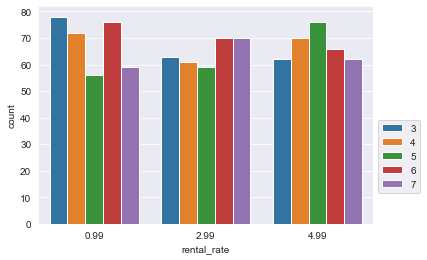

In [89]:
sns.countplot(film_df['rental_rate'],hue=film_df['rental_duration'])
plt.legend(bbox_to_anchor=(1,.5))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


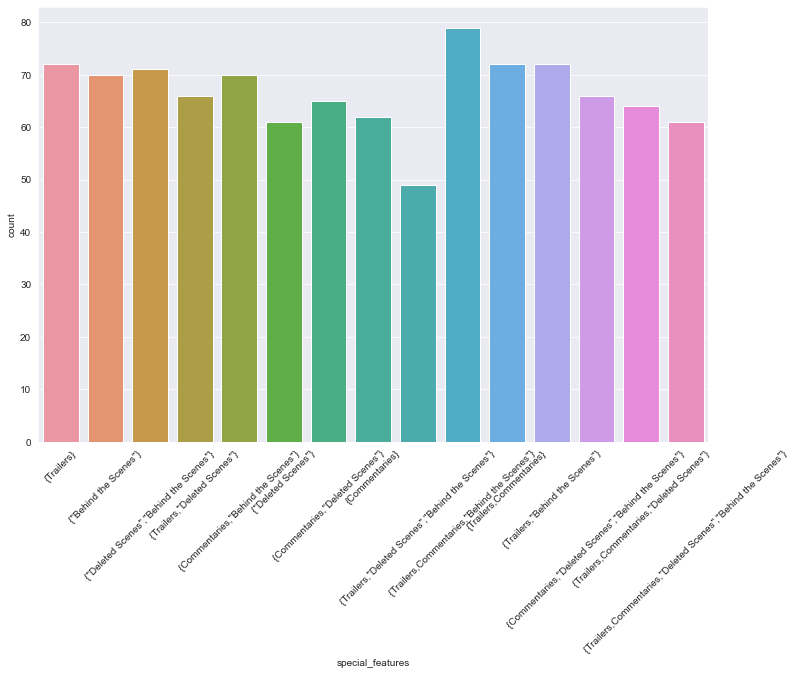

In [94]:
plt.figure(figsize=(12,8))
sns.countplot(film_df['special_features'])
plt.xticks(rotation=45)
plt.show()

In [96]:
film_df.columns

Index(['film_id', 'title', 'description', 'release_year', 'language_id',
       'rental_duration', 'rental_rate', 'length', 'replacement_cost',
       'rating', 'last_update', 'special_features', 'fulltext'],
      dtype='object')

### Let's do some further analysis on data...

In [108]:
film_df.pivot_table(columns='rating',index='rental_rate',values='film_id')[['NC-17','PG-13']]

rating,NC-17,PG-13
rental_rate,,
0.99,511.315068,547.694444
2.99,458.000000,508.459459
4.99,438.338028,544.753247


In [119]:
film_df.pivot_table(columns='rental_rate',index='replacement_cost',values='film_id',aggfunc=np.max)

rental_rate,0.99,2.99,4.99
replacement_cost,,,
9.99,996,912,915
10.99,998,993,979
11.99,970,926,995
12.99,978,923,980
13.99,990,987,903
14.99,997,937,946
15.99,924,960,843
16.99,947,928,844
17.99,992,952,964


In [111]:
film_df.pivot_table(columns='rating',index='special_features',values='film_id',aggfunc=sum)

rating,G,NC-17,PG,PG-13,R
special_features,,,,,
"{""Behind the Scenes""}",4700,4231,8798,8831,8465
"{""Deleted Scenes"",""Behind the Scenes""}",6491,7946,6174,8586,9454
"{""Deleted Scenes""}",5568,4520,4221,6845,6711
"{Commentaries,""Behind the Scenes""}",6184,9771,8963,8683,3637
"{Commentaries,""Deleted Scenes"",""Behind the Scenes""}",2870,8614,7788,9150,5295
"{Commentaries,""Deleted Scenes""}",4513,7770,7765,7112,7679
{Commentaries},4918,5152,8488,7014,8127
"{Trailers,""Behind the Scenes""}",4593,7103,5189,9253,8913
"{Trailers,""Deleted Scenes"",""Behind the Scenes""}",4146,3066,8541,2872,3924


<AxesSubplot:xlabel='rating'>

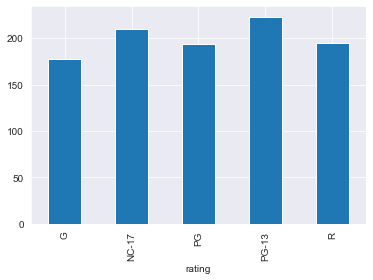

In [128]:
film_df.groupby(by='rating').count()['title'].plot(kind='bar')

In [132]:
film_df.groupby(by=['replacement_cost','rating']).count()['title'].unstack()
#unstack with gruop by create pivot table..

rating,G,NC-17,PG,PG-13,R
replacement_cost,,,,,
9.99,7,8,9,10,7
10.99,10,12,8,13,6
11.99,5,11,14,10,9
12.99,12,7,13,12,11
13.99,13,12,10,12,8
14.99,8,11,12,9,11
15.99,10,5,9,4,9
16.99,8,8,7,9,6
17.99,7,10,13,9,8


<AxesSubplot:xlabel='rating', ylabel='replacement_cost'>

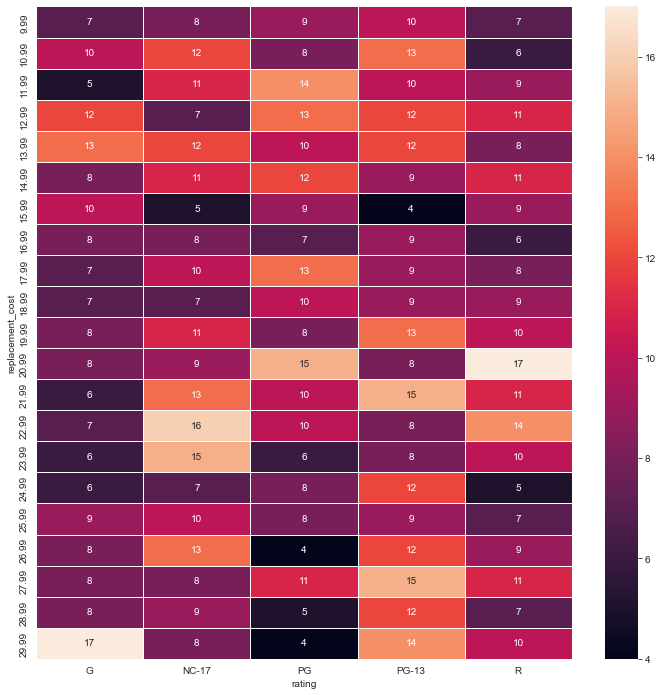

In [147]:
plt.figure(figsize=(12,12))
sns.heatmap(film_df.groupby(by=['replacement_cost','rating']).count()['title'].unstack(),annot=True,linewidths=1)

<AxesSubplot:xlabel='rating', ylabel='rental_duration'>

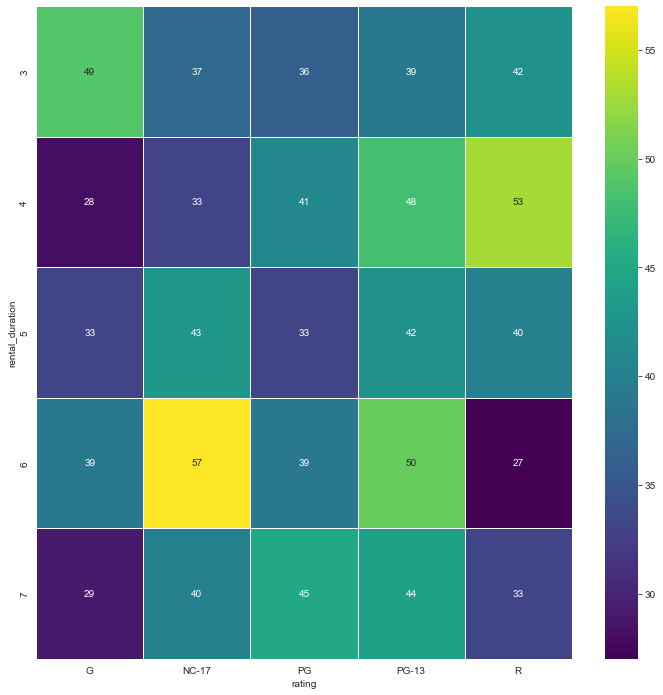

In [157]:
plt.figure(figsize=(12,12))
sns.heatmap(film_df.groupby(by=['rental_duration','rating']).count()['title'].unstack(),annot=True,linewidths=1,cmap='viridis',)

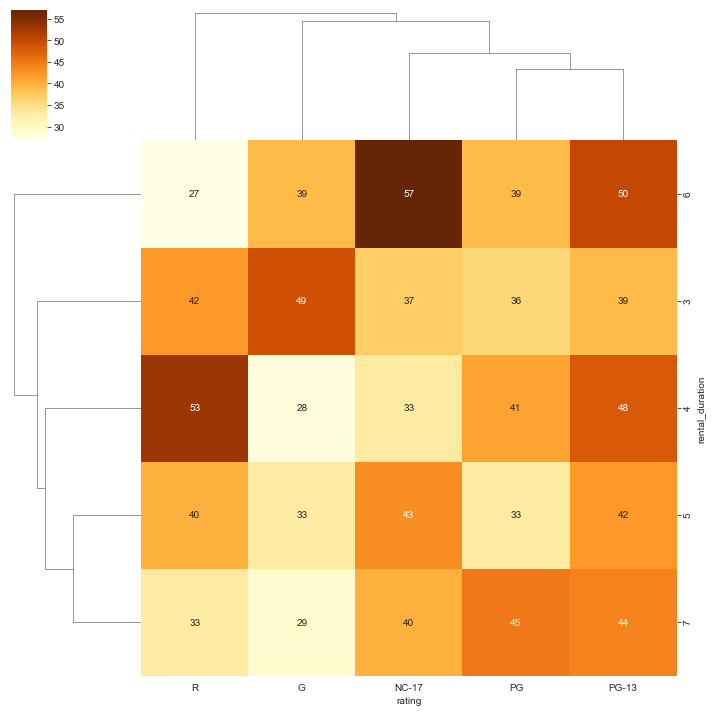

In [155]:
sns.clustermap(film_df.groupby(by=['rental_duration','rating']).count()['title'].unstack(),annot=True,cmap='YlOrBr')

### B. Let's analyze Actor Dataframe...

In [158]:
actor_df.head()

,actor_id,first_name,last_name,last_update
0,1,Penelope,Guiness,2013-05-26 14:47:57.62
1,2,Nick,Wahlberg,2013-05-26 14:47:57.62
2,3,Ed,Chase,2013-05-26 14:47:57.62
3,4,Jennifer,Davis,2013-05-26 14:47:57.62
4,5,Johnny,Lollobrigida,2013-05-26 14:47:57.62


In [159]:
actor_df.shape

(200, 4)

In [161]:
actor_df.columns

Index(['actor_id', 'first_name', 'last_name', 'last_update'], dtype='object')

In [163]:
actor_df['actor_id'].nunique()

200

In [164]:
actor_df['first_name'].nunique()

128

In [165]:
actor_df['last_name'].nunique()

121

In [166]:
actor_df['last_update'].nunique()

1

### C. Let's analyze Film Actor Dataframe...

In [169]:
film_actor_df.head()

,actor_id,film_id,last_update
0,1,1,2006-02-15 10:05:03
1,1,23,2006-02-15 10:05:03
2,1,25,2006-02-15 10:05:03
3,1,106,2006-02-15 10:05:03
4,1,140,2006-02-15 10:05:03


In [170]:
film_actor_df.shape

(5462, 3)

In [173]:
film_actor_df['actor_id'].nunique()

200

In [174]:
film_actor_df['film_id'].nunique()

997

In [175]:
### Now let's compare 3 dataframes...

In [176]:
film_df.shape

(1000, 13)

In [177]:
film_actor_df.shape

(5462, 3)

In [178]:
actor_df.shape

(200, 4)

In [ ]:
## film_df dataframe contains film_id column and film_actor_df also contains the same column..
## Similarly actor_df contains actor_id column and film_actor_df contains the same column..
## That means we can create a relation ship among all these dataframes...

In [179]:
film_df['film_id'].nunique()

1000

In [180]:
film_actor_df['film_id'].nunique()
## Three films details is missing from this table...

997

In [182]:
actor_df['actor_id'].nunique()

200

In [184]:
film_actor_df['actor_id'].nunique()
## all the actor_ids are available in the film_actor_id dataframe..

200

In [185]:
##Let's merge them together...

In [188]:
merged_df=actor_df.merge(film_df.merge(film_actor_df,on='film_id'),on='actor_id')

In [189]:
merged_df.head()

,actor_id,first_name,last_name,last_update,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,last_update_x,special_features,fulltext,last_update_y
0,1,Penelope,Guiness,2013-05-26 14:47:57.62,1,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,2013-05-26 14:50:58.951,"{""Deleted Scenes"",""Behind the Scenes""}",'academi':1 'battl':15 'canadian':20 'dinosaur...,2006-02-15 10:05:03
1,1,Penelope,Guiness,2013-05-26 14:47:57.62,23,Anaconda Confessions,A Lacklusture Display of a Dentist And a Denti...,2006,1,3,0.99,92,9.99,R,2013-05-26 14:50:58.951,"{Trailers,""Deleted Scenes""}",'anaconda':1 'australia':18 'confess':2 'denti...,2006-02-15 10:05:03
2,1,Penelope,Guiness,2013-05-26 14:47:57.62,25,Angels Life,A Thoughtful Display of a Woman And a Astronau...,2006,1,3,2.99,74,15.99,G,2013-05-26 14:50:58.951,{Trailers},'angel':1 'astronaut':11 'battl':14 'berlin':1...,2006-02-15 10:05:03
3,1,Penelope,Guiness,2013-05-26 14:47:57.62,106,Bulworth Commandments,A Amazing Display of a Mad Cow And a Pioneer w...,2006,1,4,2.99,61,14.99,G,2013-05-26 14:50:58.951,{Trailers},'amaz':4 'bulworth':1 'command':2 'cow':9 'dis...,2006-02-15 10:05:03
4,1,Penelope,Guiness,2013-05-26 14:47:57.62,140,Cheaper Clyde,A Emotional Character Study of a Pioneer And a...,2006,1,6,0.99,87,23.99,G,2013-05-26 14:50:58.951,"{Trailers,Commentaries,""Behind the Scenes""}",'ancient':19 'charact':5 'cheaper':1 'clyde':2...,2006-02-15 10:05:03


In [190]:
merged_df.shape

(5462, 18)

In [191]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5462 entries, 0 to 5461
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   actor_id          5462 non-null   int64         
 1   first_name        5462 non-null   object        
 2   last_name         5462 non-null   object        
 3   last_update       5462 non-null   object        
 4   film_id           5462 non-null   int64         
 5   title             5462 non-null   object        
 6   description       5462 non-null   object        
 7   release_year      5462 non-null   int64         
 8   language_id       5462 non-null   int64         
 9   rental_duration   5462 non-null   int64         
 10  rental_rate       5462 non-null   float64       
 11  length            5462 non-null   int64         
 12  replacement_cost  5462 non-null   float64       
 13  rating            5462 non-null   object        
 14  last_update_x     5462 n

In [198]:
merged_df[(merged_df['first_name']=='Penelope') & (merged_df['rating']=='R')&(merged_df['length']>160)]['title']

1409                 Cause Date
2832    Entrapment Satisfaction
2849            Virginian Pluto
Name: title, dtype: object

In [ ]:
## We have merged all the three dataframes and now we are able to perform differenct operations..